# Comparación de resultados

Archivo                                                      |       HV |       GD |      IGD
------------------------------------------------------------------------------------------
poblacion_final_NSGA-II_100_50_20250725_203324.pkl           |   0.5942 |   0.0006 |   0.0045
poblacion_final_NSGA-II_100_50_20250725_204824.pkl           |   0.5947 |   0.0008 |   0.0042
poblacion_final_NSGA-II_100_50_20250725_210443.pkl           |   0.5934 |   0.0014 |   0.0048
poblacion_final_NSGA-II_100_50_20250725_212240.pkl           |   0.5928 |   0.0018 |   0.0049
poblacion_final_NSGA-II_100_50_20250725_214027.pkl           |   0.5942 |   0.0007 |   0.0042
poblacion_final_NSGA-II_100_50_20250725_215818.pkl           |   0.5932 |   0.0014 |   0.0048
poblacion_final_NSGA-II_100_50_20250725_221548.pkl           |   0.5914 |   0.0027 |   0.0059
poblacion_final_NSGA-II_100_50_20250725_223225.pkl           |   0.5939 |   0.0013 |   0.0044
poblacion_final_NSGA-II_100_50_20250725_224910.pkl           | 

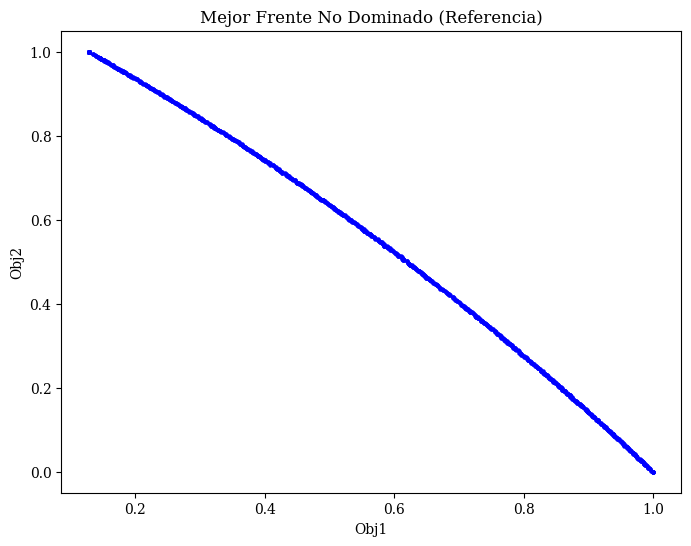

In [11]:
import os
import pickle
import numpy as np
from pymoo.indicators.hv import Hypervolume
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.visualization.scatter import Scatter

# --- Configuración ---
DIRECTORIO = "./modificacion1"  # directorio actual
EXTENSION = ".pkl"

# Leer todos los archivos .pkl del directorio
archivos = [f for f in os.listdir(DIRECTORIO) if f.endswith(EXTENSION)]

fitness_dict = {}
for archivo in archivos:
    with open(os.path.join(DIRECTORIO, archivo), "rb") as f:
        data = pickle.load(f)
        if isinstance(data, dict) and "fitnessF" in data:
            fitness_dict[archivo] = np.array(data["fitnessF"])

# Unir todos los frentes para obtener el mejor frente no dominado global
todos_fitness = np.vstack(list(fitness_dict.values()))

# Obtener frontera de referencia no dominada
nds = NonDominatedSorting()
nd_idx = nds.do(todos_fitness, only_non_dominated_front=True)
frontera_referencia = todos_fitness[nd_idx]

# Calcular punto de referencia para HV
ref_point = [0, 0]

# --- Cálculo de métricas ---
print(f"{'Archivo':<60} | {'HV':>8} | {'GD':>8} | {'IGD':>8}")
print("-" * 90)

hv_vals = []
gd_vals = []
igd_vals = []

for nombre, fitness in fitness_dict.items():
    hv = Hypervolume(ref_point=ref_point).do(fitness)
    gd = GD(frontera_referencia).do(fitness)
    igd = IGD(frontera_referencia).do(fitness)

    hv_vals.append(hv)
    gd_vals.append(gd)
    igd_vals.append(igd)

    print(f"{nombre:<60} | {hv:8.4f} | {gd:8.4f} | {igd:8.4f}")

# --- Resultados estadísticos ---
print("-" * 90)
print(f"{'PROMEDIO':<60} | {np.mean(hv_vals):8.4f} | {np.mean(gd_vals):8.4f} | {np.mean(igd_vals):8.4f}")
print(f"{'DESV.STD':<60} | {np.std(hv_vals):8.4f} | {np.std(gd_vals):8.4f} | {np.std(igd_vals):8.4f}")

# --- Gráfico del mejor frente no dominado ---
plot = Scatter(title="Mejor Frente No Dominado (Referencia)", labels=["Obj1", "Obj2"], s=5)
plot.add(frontera_referencia * -1, label="Mejor frente no dominado", color="blue", marker='o', s=5)
plot.show()

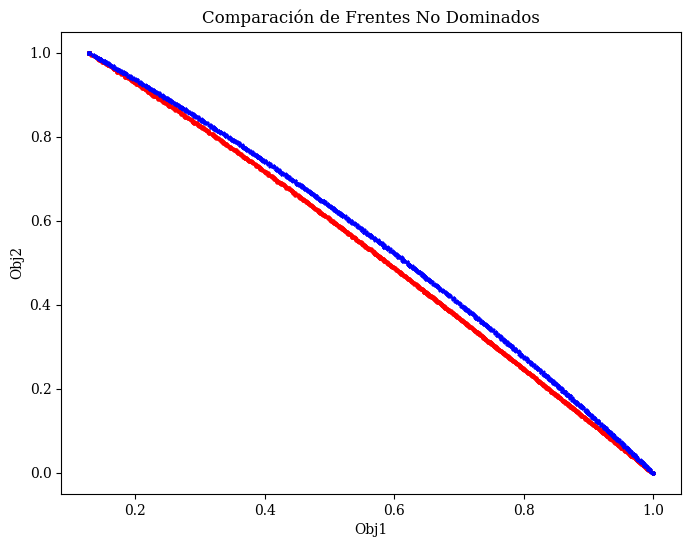

In [12]:
# --- Configuración ---
directorios = ["./original", "./modificacion1"]
extension = ".pkl"
fronteras = []
labels = []

for directorio in directorios:
    archivos = [f for f in os.listdir(directorio) if f.endswith(extension)]
    fitness_dict = {}
    for archivo in archivos:
        with open(os.path.join(directorio, archivo), "rb") as f:
            data = pickle.load(f)
            if isinstance(data, dict) and "fitnessF" in data:
                fitness_dict[archivo] = np.array(data["fitnessF"])
    todos_fitness = np.vstack(list(fitness_dict.values()))
    nds = NonDominatedSorting()
    nd_idx = nds.do(todos_fitness, only_non_dominated_front=True)
    frontera = todos_fitness[nd_idx]
    fronteras.append(frontera)
    labels.append(directorio)

# --- Gráfico de ambos frentes no dominados ---
plot = Scatter(title="Comparación de Frentes No Dominados", labels=["Obj1", "Obj2"], s=5)
plot.add(fronteras[0] * -1, label=labels[0], color="red", marker='o', s=5)
plot.add(fronteras[1] * -1, label=labels[1], color="blue", marker='x', s=5)
plot.show()
